# Introduction to Quant Finance

## Module 1.5: Bayesian inference

### 1.5.3 Representing prior knowledge: postcodes


Simple moving average
Exponential moving average

https://www.investopedia.com/terms/s/sma.asp


When plotting or performing an OLS on moving averages, ensure you use the centrepoint of the period

Exponential inputs new data faster, but may produce false positives

$SMA_n = \frac{1}{k}\sum_{n-k}^{n}{X_k}$

Where $k$ is the period of the moving average

${EMA}_n = \alpha{X_n} + (1-\alpha){EMA}_{n-1}$

Where $\alpha$ is a smoothing constant, sometimes given as $\frac{\beta}{1+k}$, where $\beta$ is just a different smoothing constant (usually 1 or 2) and $k$ is the period of the moving average (or in alternate forms, the lag). Given both are constants, we can replace with the simple $\alpha$.


Moving averages lag the current price - past prices are used in the computation.

In [22]:
%run setup.ipy

### Exercise

1. Compute the Simple Moving Average of a stock price for a $k$ value of 20. Investigate the pandas `rolling` function.
2. Compute the Exponential moving average using pandas. There is a `ewm` function available on a series.
3. Plot the two methods and examine how they change, and how quickly, with sudden swings in the data.

In [23]:
# Solutions

import pandas as pd
import quandl

prices = quandl.get("PERTH/SPASX200A_M")


In [24]:
prices['SMA'] = prices.rolling(20).mean().shift(-10)

In [25]:
prices.columns

Index(['Index OEM', 'SMA'], dtype='object')

In [26]:
prices['EMA'] = prices['Index OEM'].ewm?

Object `ewm` not found.


In [ ]:
prices['EMA'] = prices['Index OEM'].ewm

In [27]:
prices['EMA'] = prices['Index OEM'].ewm(span=20).mean()

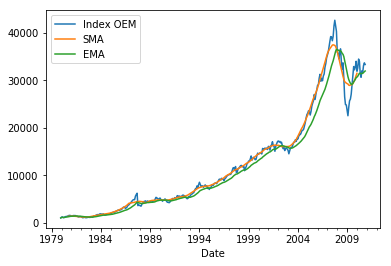

In [28]:
prices.plot()

## Extended Exercise

A simple trading strategy is to compare the actual the moving average values, and take a position when they cross over. For instance, if the price crosses over from above, go short. If the price crosses over from below, go long.

Grab the stock prices for end of day from Quandl for a given stock (the solution uses Disney).

Find these crossover points, and compute the profit if you take these positions.

Hints:

* Create a column that indicates if the closing price is above or below the SMA
* What would you get if you ran the `diff` function on this data?

In [32]:
# Solution
import quandl
import my_secrets
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY

In [33]:
stocks = quandl.get("EOD/DIS")

In [36]:
stocks.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1962-01-02,37.25,38.50,37.25,37.25,2098.0,0.0,1.0,0.137931,0.142559,0.137931,0.137931,408858.24
1962-01-03,37.25,37.88,37.25,37.75,1998.0,0.0,1.0,0.137931,0.140264,0.137931,0.139782,389370.24
1962-01-04,37.75,37.88,37.50,37.75,2397.0,0.0,1.0,0.139782,0.140264,0.138857,0.139782,467127.36
1962-01-05,37.75,38.00,37.63,37.88,2397.0,0.0,1.0,0.139782,0.140708,0.139338,0.140264,467127.36
1962-01-08,37.88,38.38,37.00,37.75,3197.0,0.0,1.0,0.140264,0.142115,0.137005,0.139782,623031.36


In [38]:
stocks['SMA'] = stocks['Close'].rolling(20).mean().shift(-10)

In [41]:
stocks['Above_SMA'] = (stocks['Close'] > stocks['SMA']).astype('int')

In [42]:
# Compare this position to the previous, if different, this value is non-zero
stocks['PositionChange'] = stocks['Above_SMA'].diff()

In [45]:
# As you can see, PositionChange is -1 when we crossover from above, and 1 when we crossover from below
columns = ['Close', 'SMA', "Above_SMA", "PositionChange"]
stocks[columns].head(30)

,Close,SMA,Above_SMA,PositionChange
Date,,,,
1962-01-02,37.25,NaN,0,NaN
1962-01-03,37.75,NaN,0,0.0
1962-01-04,37.75,NaN,0,0.0
1962-01-05,37.88,NaN,0,0.0
1962-01-08,37.75,NaN,0,0.0
1962-01-09,38.50,NaN,0,0.0
1962-01-10,38.87,NaN,0,0.0
1962-01-11,40.00,NaN,0,0.0
1962-01-12,38.75,NaN,0,0.0
